In [115]:
import pandas as pd

In [116]:
df=pd.read_csv('/content/workout_fitness_tracker_data.csv')

In [117]:
df.head(5)

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [118]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [119]:
x = df[['Workout Intensity','Mood Before Workout','Mood After Workout','Distance (km)' ,'Workout Duration (mins)', 'Calories Burned', 'Distance (km)', 'Steps Taken']]
display(x.head())

,Workout Intensity,Mood Before Workout,Mood After Workout,Distance (km),Workout Duration (mins),Calories Burned,Distance (km),Steps Taken
0,High,Tired,Fatigued,14.44,79,384,14.44,8850
1,High,Happy,Energized,1.10,73,612,1.10,2821
2,High,Happy,Fatigued,7.28,27,540,7.28,18898
3,Medium,Neutral,Neutral,6.55,39,672,6.55,14102
4,Medium,Stressed,Energized,3.17,56,410,3.17,16518


In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')
x_encoded=ohe.fit_transform(x[['Mood Before Workout','Mood After Workout']])
x=pd.concat([x,x_encoded],axis=1)
x=x.drop(columns=['Mood Before Workout','Mood After Workout'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Workout Intensity'] = le.fit_transform(x['Workout Intensity'])

In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
x['Cluster'] = kmeans.fit_predict(x)
display(x.head())

,Workout Intensity,Distance (km),Workout Duration (mins),Calories Burned,Distance (km),Steps Taken,Mood Before Workout_Happy,Mood Before Workout_Neutral,Mood Before Workout_Stressed,Mood Before Workout_Tired,Mood After Workout_Energized,Mood After Workout_Fatigued,Mood After Workout_Neutral,Cluster
0,0,14.44,79,384,14.44,8850,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0,1.10,73,612,1.10,2821,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0,7.28,27,540,7.28,18898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,2,6.55,39,672,6.55,14102,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4,2,3.17,56,410,3.17,16518,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2


In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(x.drop('Cluster', axis=1))

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

features_pca_x = pd.DataFrame(features_pca, columns=['Principal Component 1', 'Principal Component 2'])
features_pca_x['Cluster'] = x['Cluster'].values

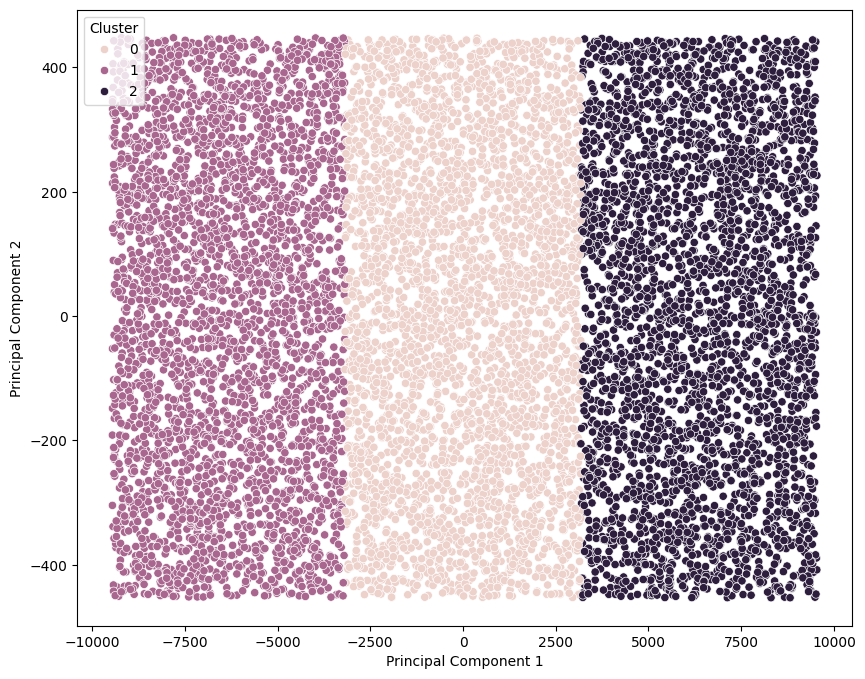

In [124]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=features_pca_x)
plt.show()

In [125]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x.drop('Cluster', axis=1), x['Cluster'])
print(f"The Silhouette Score is: {silhouette_avg}")

The Silhouette Score is: 0.5845027179316844
